Code Reuse Session 2

In [67]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV ,train_test_split
import numpy as np

Code Reuse Session 2

In [68]:
# Read the mortality dataset from CSV file
mortality_data = pd.read_csv('mortality_status.csv')

Code Reuse Session 2

In [69]:
# Configure pandas display settings for better visualization
pd.set_option('display.max_rows', 500)      # Show up to 500 rows
pd.set_option('display.max_columns', 500)   # Show up to 500 columns
pd.set_option('display.width', 150)         # Set display width to 150 characters

Code Reuse Session 2

In [70]:
#Display dataset information (rows, columns, data types)
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3984 entries, 0 to 3983
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3984 non-null   int64  
 1   Sex                     3984 non-null   int64  
 2   T_Stage                 3984 non-null   int64  
 3   N_Stage                 3984 non-null   int64  
 4   6th_Stage               3984 non-null   int64  
 5   Differentiated          3984 non-null   int64  
 6   Grade                   3984 non-null   int64  
 7   A_Stage                 3984 non-null   int64  
 8   Tumor_Size              3984 non-null   int64  
 9   Estrogen_Status         3984 non-null   int64  
 10  Progesterone_Status     3984 non-null   int64  
 11  Regional_Node_Examined  3984 non-null   float64
 12  Reginol_Node_Positive   3984 non-null   int64  
 13  Survival_Months         3984 non-null   int64  
 14  Mortality_Status        3984 non-null   

Code Reuse Session 2

In [71]:
# Show first few rows of the dataset
mortality_data.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60,1
1,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62,1
2,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75,1
3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84,1
4,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50,1


Code Reuse Session 2

In [72]:
# Extract features and target variable
feature_cols = [column for column in mortality_data.columns if column != 'Mortality_Status']
X = mortality_data[feature_cols]      # Features matrix
y = mortality_data['Mortality_Status'] # Target variable

Code Reuse Session 2

In [73]:
# Split data into training and test sets (80-20 split) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20,stratify=y)

Week 3 Seminar Session

In [74]:
# Display shapes of training and testing sets
print('whole data set ',mortality_data.shape)
print('x_train shape',X_train.shape)
print('X_test shape',X_test.shape)


whole data set  (3984, 15)
x_train shape (3187, 14)
X_test shape (797, 14)


Code Reuse Session 2

In [75]:
# Initialize and train Logistic Regression model
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Code Reuse Session 2

In [76]:
# Generate predictions using logistic regression
y_pred = logreg.predict(X_test)

Code Reuse Session 2

In [77]:
# Create comparison dataframe
Comparison_df=pd.DataFrame({'Actual' : y_test,  'Predicted' : y_pred})
Comparison_df

,Actual,Predicted
741,1,1
3972,1,1
698,1,1
605,1,1
115,1,1
...,...,...
2980,1,1
3368,1,1
1068,1,1
3520,1,1


Code Reuse Session 2

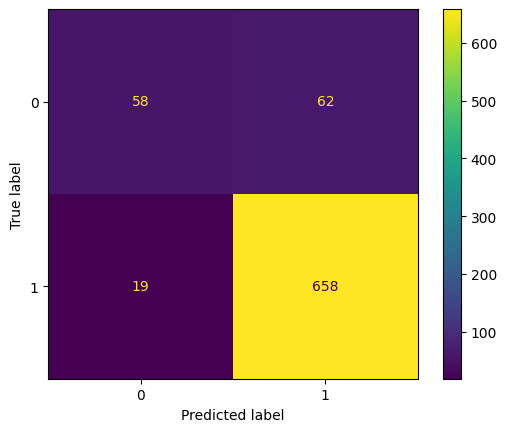

In [78]:
# Evaluate logistic regression performance
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm = confusion_matrix(y_test,y_pred,labels=logreg.classes_)
desp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
desp.plot()

Code Reuse Session 2

In [79]:
# Calculate training accuracy
y_pred_train = logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.898650768748039


Code Reuse Session 2

In [80]:
# Calculate testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print ("The accuracy is: ", accuracy)

The accuracy is:  0.8983688833124216


In [81]:
# Generate detailed classification metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       120
           1       0.91      0.97      0.94       677

    accuracy                           0.90       797
   macro avg       0.83      0.73      0.77       797
weighted avg       0.89      0.90      0.89       797



Code Reuse Session 2

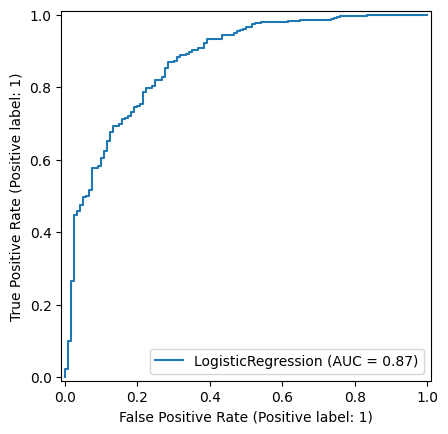

In [82]:
# Plot ROC curve for logistic regressio
from sklearn.metrics import RocCurveDisplay
logreg_roc = RocCurveDisplay.from_estimator(logreg, X_test, y_test)

Code Reuse Session 2

In [83]:
param_grid = {'C': np.arange(0.1,10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']} 
lr_gscv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
lr_gscv.fit(X, y)
lr_gscv.best_params_ 

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Code Reuse Session 2

In [84]:
lr_y_pred = lr_gscv.predict(X_test)

Code Reuse Session 2

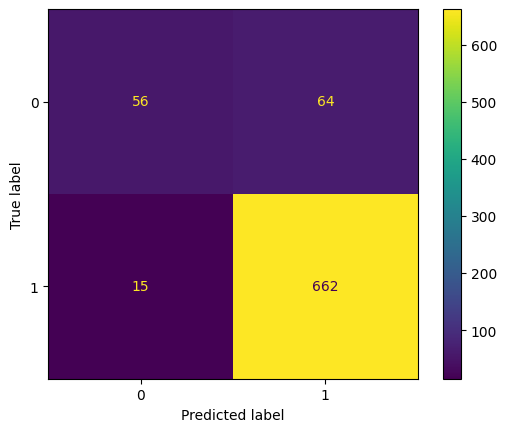

In [85]:
lr_gscv_cm = confusion_matrix(y_test, lr_y_pred, labels=logreg.classes_)
lr_gscv_desp = ConfusionMatrixDisplay(lr_gscv_cm, display_labels=logreg.classes_)
lr_gscv_desp.plot()

Code Reuse Session 2

In [86]:
print("Classification Report for Grid Search Logistic Regression:")
print(classification_report(y_test, lr_y_pred, zero_division=0))

Classification Report for Grid Search Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       120
           1       0.91      0.98      0.94       677

    accuracy                           0.90       797
   macro avg       0.85      0.72      0.77       797
weighted avg       0.89      0.90      0.89       797



Code Reuse Session 2

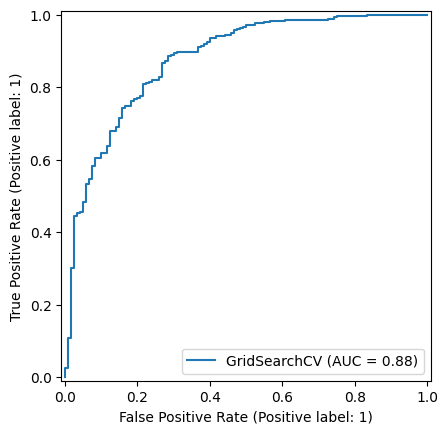

In [87]:
logreg_roc_gscv = RocCurveDisplay.from_estimator(lr_gscv, X_test, y_test)

In [88]:
# Initialize and train KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Code Reuse Session 2

In [89]:
# Evaluate KNN performance
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print ("the accuracy is: ", accuracy)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn,zero_division=0))

the accuracy is:  0.877038895859473
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.65      0.40      0.49       120
           1       0.90      0.96      0.93       677

    accuracy                           0.88       797
   macro avg       0.77      0.68      0.71       797
weighted avg       0.86      0.88      0.86       797



Code Reuse Session 2

In [90]:
# Optimize KNN using Grid SearchCV
param_grid = {'n_neighbors': np.arange(1,30), 'metric': ['euclidean', 'manhattan']}
knn_gscv = GridSearchCV(knn, param_grid, cv = 5,scoring='roc_auc')
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

Code Reuse Session 2

In [91]:
# Display best parameters from grid search
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 28}

Code Reuse Session 2

In [92]:
# Make predictions with optimized KNN
y_pred = knn_gscv.predict(X_test)

Code Reuse Session 2

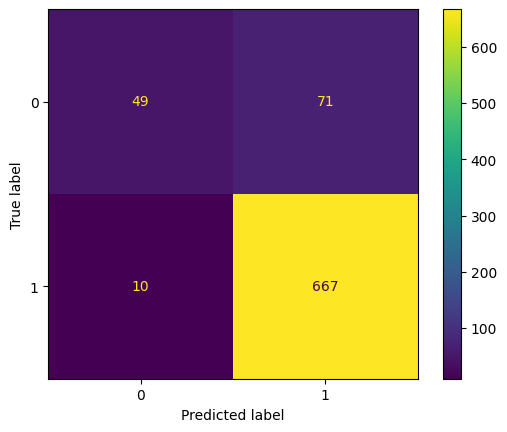

In [93]:
# Create confusion matrix for optimized KNN
cm_knn = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=np.unique(y_test))
disp_knn_cm.plot()

Code Reuse Session 2

In [94]:
# Generate classification report for optimized KNN
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.41      0.55       120
           1       0.90      0.99      0.94       677

    accuracy                           0.90       797
   macro avg       0.87      0.70      0.75       797
weighted avg       0.89      0.90      0.88       797



Week 4 Seminar Session

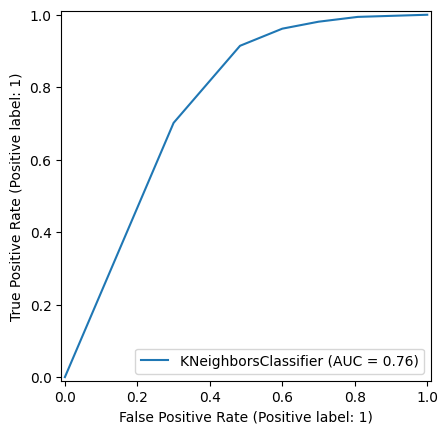

In [95]:
# Plot ROC curve for KNN
knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)

Code Reuse Session

In [96]:
# Initialize and evaluate Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.7779171894604768


Week 4 Seminar Session

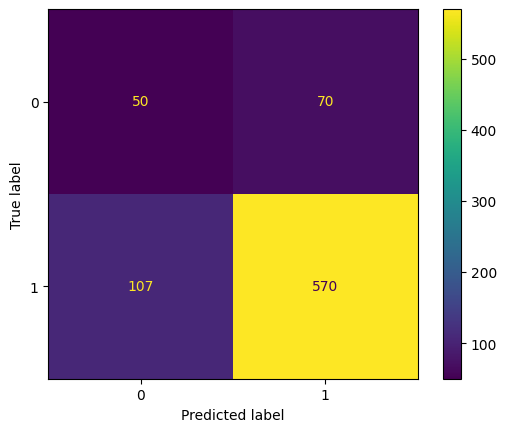

In [97]:
# Create confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb, labels = nb.classes_)
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

Week 4 Seminar Session

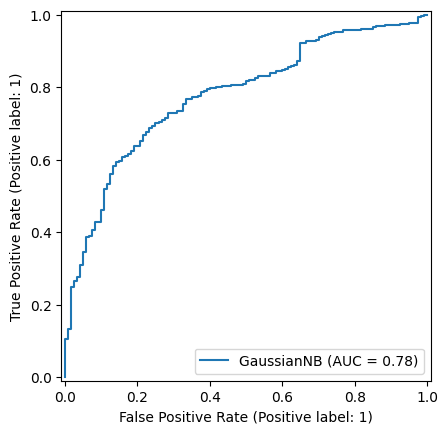

In [98]:
# Plot ROC curve for Naive Bayes
nb_roc = RocCurveDisplay.from_estimator(nb, X_test, y_test)

Week 4 Seminar Session

In [99]:
# Generate classification report for Naive Bayes
print("Classification Report for Naïve Bayes:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.32      0.42      0.36       120
           1       0.89      0.84      0.87       677

    accuracy                           0.78       797
   macro avg       0.60      0.63      0.61       797
weighted avg       0.80      0.78      0.79       797

